<a href="https://colab.research.google.com/github/Sunnnyyy16/Dacon_study/blob/main/FIFA/FIFA_payment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DACON FIFA 선수 이적료 예측 경진대회
대회 사이트: https://dacon.io/competitions/open/235538/data

# 목차
0. 데이터 로드
1. 데이터 EDA, visualization
2. 데이터 전처리
3. 모델 생성 및 학습
4. 결론

* 참고



# 0.데이터로드

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!cp /gdrive/MyDrive/Dacon_study/FIFA/FIFA_test.csv ./
!cp /gdrive/MyDrive/Dacon_study/FIFA/FIFA_train.csv ./
!cp /gdrive/MyDrive/Dacon_study/FIFA/submission.csv ./

In [ ]:
train = pd.read_csv('FIFA_train.csv')
test = pd.read_csv('FIFA_test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


* id: 선수 고유 아이디
* name: 이름
* age: 나이
* continent : 선수 국적이 포함된 대륙
* contract_until: 선수 계약 기간이 언제까지인지
* position: 선수가 선호하는 포지션 ex) 공격수, 수비수 등
* prefet_foot : 선수가 선호하는 발 ex)오른발
* reputation: 선수가 윰여한 정도 ex) 높은 수치일 수록 유명한 선수
* stat_overall : 선수의 현재 능력치
* stat_potential: 선수가 경험 및 노력을 통해 발전할 수 있는 정도
* stat_skill_moves: 선수의 개인기 능력칙
* value: FIFA가 선정한 선수 이적 시장 가격 (단위:유로)

In [ ]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [ ]:
print(train.shape)
print(test.shape)

(8932, 12)
(3828, 11)


# 1.데이터 EDA, visualization

In [ ]:
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


## data cleansing

In [ ]:
train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [ ]:
test.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

null값 처리 불필요

In [ ]:
# 10 players who have high value
train.sort_values(by='value',ascending=False).head(10)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
17,30,Isco,26,europe,2022,ST,right,3.0,88,91,4.0,73500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
14,26,M. Salah,26,africa,2023,MF,left,3.0,88,89,4.0,69500000.0
18,32,Coutinho,26,south america,2023,ST,right,3.0,88,89,5.0,69500000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
26,45,P. Pogba,25,europe,2021,MF,right,4.0,87,91,5.0,64000000.0
7,14,N. Kanté,27,europe,2023,MF,right,3.0,89,90,2.0,63000000.0
27,47,R. Lukaku,25,europe,2022,ST,left,3.0,87,89,3.0,62500000.0


연봉 Top 10 선수들

In [ ]:
# 10 players who have high reputation 
train.sort_values(by='reputation',ascending=False).head(10)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
65,109,Z. Ibrahimović,36,europe,2022,ST,right,5.0,85,85,5.0,14000000.0
12,22,M. Neuer,32,europe,2021,GK,right,5.0,89,89,1.0,38000000.0
61,105,K. Benzema,30,europe,2021,ST,right,4.0,85,85,4.0,37000000.0
32,54,Piqué,31,europe,2022,DF,right,4.0,87,87,2.0,34000000.0
38,66,T. Müller,28,europe,2021,MF,right,4.0,86,86,3.0,45000000.0
40,68,M. Reus,29,europe,2023,MF,right,4.0,86,86,4.0,43500000.0
43,76,Iniesta,34,europe,2021,ST,right,4.0,86,86,4.0,21500000.0
231,378,Hulk,31,south america,2020,MF,left,4.0,81,81,4.0,15500000.0


기여 top 10 선수들

메시, 수아레즈는 연봉도 제일 높고 기여도도 높다

In [ ]:
# continent별 reputation, stat_overall, stat_potential, stat_skill_moves 평균 
train.groupby('continent')['reputation','stat_overall','stat_potential','stat_skill_moves','value'].mean().reset_index()

,continent,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,africa,1.122053,68.041609,72.360610,2.606103,2.972247e+06
1,asia,1.054638,63.381194,68.208386,2.259212,1.035146e+06
2,europe,1.146937,67.083051,72.387636,2.371665,2.928125e+06
3,oceania,1.022857,63.011429,68.640000,2.234286,8.225429e+05
4,south america,1.130773,68.643487,72.635184,2.481578,3.183204e+06


대륙별 기여도 평균: 아프라카> 아시아> 유럽 > 오세아니아 > 남아메리카

## 시각화

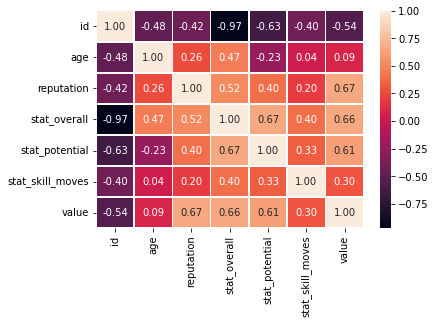

In [ ]:
# 상관계수
plt.figure()
sns.heatmap(data=train.corr(),annot=True,fmt='.2f',linewidths=.5)

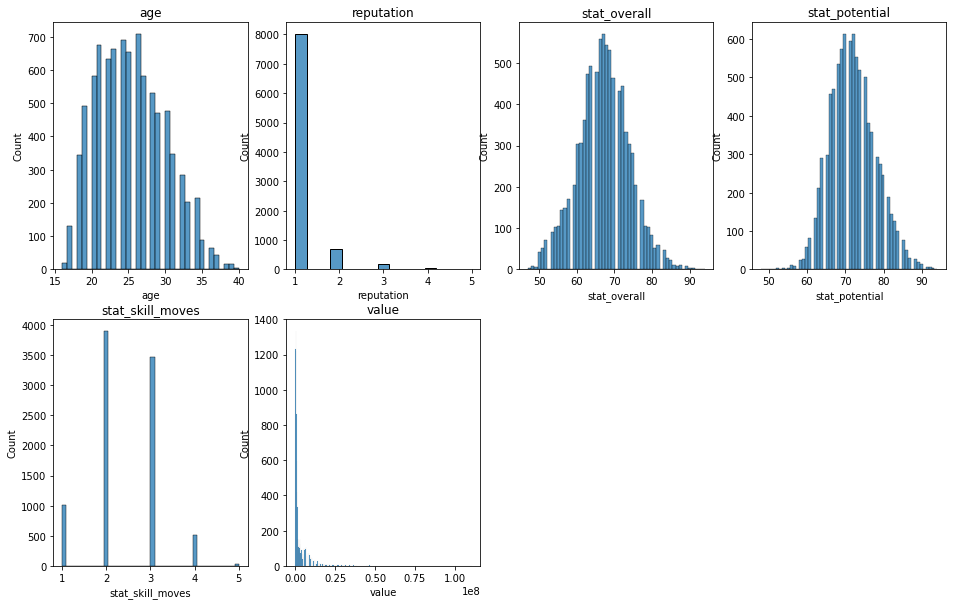

In [ ]:
# histplot으로 수치형 데이터 분포 확인
plt.figure(figsize=(16,10))

cols = train.columns[7:].insert(0,'age')
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title(cols[i])
  sns.histplot(train[cols[i]])
plt.show()

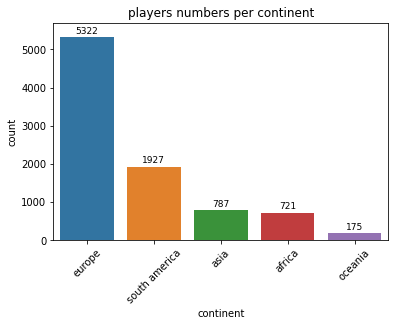

In [ ]:
ax= sns.countplot(x='continent',data=train, order = train['continent'].value_counts().index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)
ax.set_ylim(0,5700)

plt.xticks(rotation=45)

plt.title('players numbers per continent')
plt.show()

유럽출신 선수들이 제일 많다

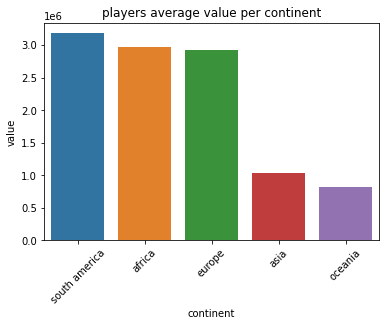

In [ ]:
plt.figure()
sns.barplot(x='continent',y='value',data=train.groupby('continent')['value'].mean().reset_index().sort_values(by='value',ascending=False))

plt.xticks(rotation=45)

plt.title('players average value per continent')
plt.show()

value 평균 : south america > africa > europe > asia > oceania

In [ ]:
train.groupby('continent')['value'].mean().reset_index().sort_values(by='value',ascending=False)

,continent,value
4,south america,3.183204e+06
0,africa,2.972247e+06
2,europe,2.928125e+06
1,asia,1.035146e+06
3,oceania,8.225429e+05


대륙별 value 평균 : south america > africa > europe > asia > oceania

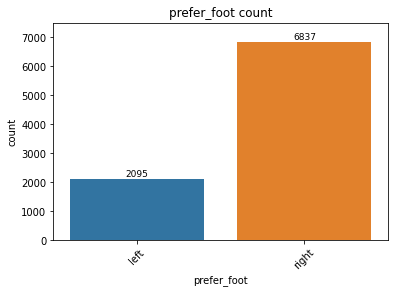

In [ ]:
ax= sns.countplot(x='prefer_foot',data=train)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)
ax.set_ylim(0,7500)

plt.xticks(rotation=45)

plt.title('prefer_foot count')
plt.show()

오른발 선호하는 선수가 매우 많음

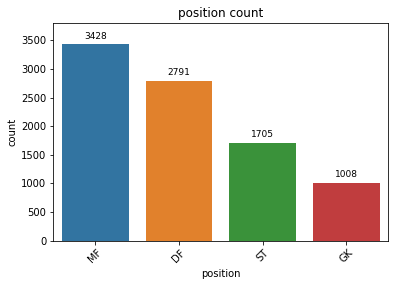

In [ ]:
ax= sns.countplot(x='position',data=train, order= train['position'].value_counts().index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)
ax.set_ylim(0,3800)

plt.xticks(rotation=45)

plt.title('position count')
plt.show()

MF (미드필더) > DF(Defensive Midfielder) > ST(striker) > GK (골키퍼)

# 2.데이터전처리

In [ ]:
train['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [ ]:
# 계약 연도 추출
train['contract_until'] = train['contract_until'].str[-4:].astype(int)
test['contract_until'] = test['contract_until'].str[-4:].astype(int)

In [ ]:
train['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

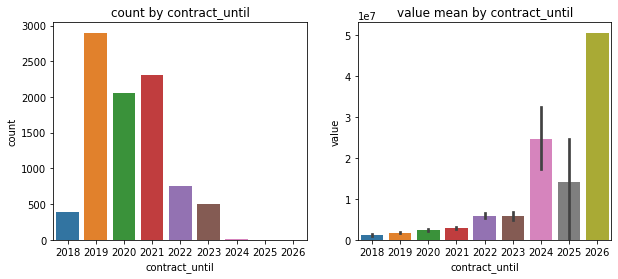

In [ ]:
plt.figure(figsize=(10,4))
ax1=plt.subplot(1,2,1)
sns.countplot(x='contract_until',data=train)
plt.title("count by contract_until")

ax2=plt.subplot(1,2,2)
sns.barplot(x='contract_until',y='value', data=train)
plt.title("value mean by contract_until")
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   int64  
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 837.5+ KB


## 라벨인코딩

In [ ]:
train.groupby('continent').value.mean().sort_values()

continent
oceania          8.225429e+05
asia             1.035146e+06
europe           2.928125e+06
africa           2.972247e+06
south america    3.183204e+06
Name: value, dtype: float64

In [ ]:
# train["continent_rank"] = train.continent.map({'oceania':1, 'asia': 2,'europe':3, 'africa':4, 'south america':5})
# test["continent_rank"] = test.continent.map({'oceania':1, 'asia': 2,'europe':3, 'africa':4, 'south america':5})

In [ ]:
train.groupby('position').value.mean().sort_values()

position
GK    1.992073e+06
DF    2.304348e+06
MF    3.121762e+06
ST    3.330361e+06
Name: value, dtype: float64

In [ ]:
# train['position_rank'] = train.position.map({'GK':1,'DF':2,'MF':3,'ST':4})
# test['position_rank'] = test.position.map({'GK':1,'DF':2,'MF':3,'ST':4})

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# encoder.fit(train['prefer_foot'])
# train['prefer_foot'] = encoder.transform(train['prefer_foot'])
# test['prefer_foot'] = encoder.transform(test['prefer_foot'])

## Standard Scaling

In [ ]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [ ]:
#Standard scaler
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
scaler= StandardScaler()

# 변환 필요한 feature 선택
transform_df= train[['age','reputation','stat_overall','stat_potential','stat_skill_moves']]

std_transform_df = scaler.fit_transform(transform_df)
train[transform_df.columns] = std_transform_df
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,1.249309,south america,2021,ST,left,9.130280,3.925708,3.674598,2.059652,110500000.0
1,3,De Gea,0.386357,europe,2020,GK,right,6.770499,3.488041,3.507592,-1.806307,72000000.0
2,7,L. Suárez,1.249309,south america,2021,ST,right,9.130280,3.488041,3.173580,0.770999,80000000.0
3,8,Sergio Ramos,1.465046,europe,2020,DF,right,6.770499,3.488041,3.173580,0.770999,51000000.0
4,9,J. Oblak,-0.045118,europe,2021,GK,right,4.410719,3.342152,3.507592,-1.806307,68000000.0


In [ ]:
#Standard scaler
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
scaler= StandardScaler()

# 변환 필요한 feature 선택
transform_df= test[['age','reputation','stat_overall','stat_potential','stat_skill_moves']]

std_transform_df = scaler.fit_transform(transform_df)
test[transform_df.columns] = std_transform_df
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,1.664392,europe,2022,ST,right,8.599478,3.859778,3.569820,3.309849
1,2,Neymar Jr,0.151739,south america,2022,ST,right,8.599478,3.570255,3.406758,3.309849
2,4,K. De Bruyne,0.367833,europe,2023,MF,right,6.369358,3.425494,3.243695,2.029524
3,5,E. Hazard,0.367833,europe,2020,ST,right,6.369358,3.425494,3.080633,2.029524
4,6,L. Modrić,1.448299,europe,2020,MF,right,6.369358,3.425494,3.080633,2.029524


In [ ]:
# test 더미화
# test_df = test.drop(['id','name','position','continent'],axis=1)
test_df = test.drop(['id','name'],axis=1)
test_df = pd.get_dummies(test_df)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      3828 non-null   float64
 1   contract_until           3828 non-null   int64  
 2   reputation               3828 non-null   float64
 3   stat_overall             3828 non-null   float64
 4   stat_potential           3828 non-null   float64
 5   stat_skill_moves         3828 non-null   float64
 6   continent_africa         3828 non-null   uint8  
 7   continent_asia           3828 non-null   uint8  
 8   continent_europe         3828 non-null   uint8  
 9   continent_oceania        3828 non-null   uint8  
 10  continent_south america  3828 non-null   uint8  
 11  position_DF              3828 non-null   uint8  
 12  position_GK              3828 non-null   uint8  
 13  position_MF              3828 non-null   uint8  
 14  position_ST             

# 3.모델생성 및 학습

## train, val 데이터 split

In [ ]:
# X= train.drop(['id','name','continent','position','value'],axis=1)
X= train.drop(['id','name','value'],axis=1)
y= np.log1p(train.value)

In [ ]:
X=pd.get_dummies(X)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      8932 non-null   float64
 1   contract_until           8932 non-null   int64  
 2   reputation               8932 non-null   float64
 3   stat_overall             8932 non-null   float64
 4   stat_potential           8932 non-null   float64
 5   stat_skill_moves         8932 non-null   float64
 6   continent_africa         8932 non-null   uint8  
 7   continent_asia           8932 non-null   uint8  
 8   continent_europe         8932 non-null   uint8  
 9   continent_oceania        8932 non-null   uint8  
 10  continent_south america  8932 non-null   uint8  
 11  position_DF              8932 non-null   uint8  
 12  position_GK              8932 non-null   uint8  
 13  position_MF              8932 non-null   uint8  
 14  position_ST             

In [ ]:
X.head()

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,1.249309,2021,9.130280,3.925708,3.674598,2.059652,0,0,0,0,1,0,0,0,1,1,0
1,0.386357,2020,6.770499,3.488041,3.507592,-1.806307,0,0,1,0,0,0,1,0,0,0,1
2,1.249309,2021,9.130280,3.488041,3.173580,0.770999,0,0,0,0,1,0,0,0,1,0,1
3,1.465046,2020,6.770499,3.488041,3.173580,0.770999,0,0,1,0,0,1,0,0,0,0,1
4,-0.045118,2021,4.410719,3.342152,3.507592,-1.806307,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X,y, test_size=.20, random_state=42)

## K fold

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10, shuffle=True, random_state=42)

## NGBoost

In [ ]:
!pip install ngboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 학습

In [ ]:
from ngboost import NGBRegressor
from sklearn.metrics import mean_squared_error
ngb_leg = NGBRegressor(random_state = 42)

In [ ]:
rmse_list = []
ngb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
  tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
  val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
  ngb_leg.fit(tr_x, tr_y)
    
  pred = np.expm1([0 if x < 0 else x for x in ngb_leg.predict(val_x)])
  sub_pred = np.expm1([0 if x < 0 else x for x in ngb_leg.predict(test_df)])
  rmse = np.sqrt(mean_squared_error(val_y, pred))
    
  rmse_list.append(rmse)
    
  ngb_pred += (sub_pred / 10)

[iter 0] loss=1.7507 val_loss=0.0000 scale=1.0000 norm=1.2801
[iter 100] loss=0.7655 val_loss=0.0000 scale=2.0000 norm=1.1166
[iter 200] loss=-0.0993 val_loss=0.0000 scale=2.0000 norm=0.9205
[iter 300] loss=-0.7631 val_loss=0.0000 scale=2.0000 norm=0.8136
[iter 400] loss=-1.0813 val_loss=0.0000 scale=2.0000 norm=0.8429
[iter 0] loss=-1.1869 val_loss=0.0000 scale=2.0000 norm=0.8966
[iter 100] loss=-1.2407 val_loss=0.0000 scale=1.0000 norm=0.4590
[iter 200] loss=-1.2826 val_loss=0.0000 scale=2.0000 norm=0.9302
[iter 300] loss=-1.3139 val_loss=0.0000 scale=1.0000 norm=0.4707
[iter 400] loss=-1.3445 val_loss=0.0000 scale=1.0000 norm=0.4740
[iter 0] loss=-1.3593 val_loss=0.0000 scale=1.0000 norm=0.4799
[iter 100] loss=-1.3818 val_loss=0.0000 scale=1.0000 norm=0.4790
[iter 200] loss=-1.4006 val_loss=0.0000 scale=1.0000 norm=0.4802
[iter 300] loss=-1.4150 val_loss=0.0000 scale=1.0000 norm=0.4820
[iter 400] loss=-1.4280 val_loss=0.0000 scale=1.0000 norm=0.4829
[iter 0] loss=-1.4354 val_loss=0.

## GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_leg = GradientBoostingRegressor(random_state=42)

### 학습

In [ ]:
rmse_list = []
gbm_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
  tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
  val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
  gbm_leg.fit(tr_x, tr_y)
    
  pred = np.expm1([0 if x < 0 else x for x in gbm_leg.predict(val_x)])
  sub_pred = np.expm1([0 if x < 0 else x for x in gbm_leg.predict(test_df)])
  rmse = np.sqrt(mean_squared_error(val_y, pred))
    
  rmse_list.append(rmse)
    
  gbm_pred += (sub_pred / 10)

## RandomForest

### 학습

In [ ]:
# 모델링 라이브러리
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
# rf_reg.fit(train_x, train_y)
# pred= rf_reg.predict(val_x)

# mse= mean_squared_error(val_y, pred)
# rmse= mse**(1/2)

# print("RMSE: ", rmse)

In [ ]:
rmse_list = []
rf_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
  tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
  val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
  rf_reg.fit(tr_x, tr_y)
    
  pred = np.expm1([0 if x < 0 else x for x in rf_reg.predict(val_x)])
  sub_pred = np.expm1([0 if x < 0 else x for x in rf_reg.predict(test_df)])
  rmse = np.sqrt(mean_squared_error(val_y, pred))
    
  rmse_list.append(rmse)
    
  rf_pred += (sub_pred / 10)

## XGBoost

### 학습

In [ ]:
# 모델링 라이브러리
# 모델링 관련 라이브러리
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=200, random_state=42, eval_set=[val_x,val_y])

# print(len(train_x), len(val_x))
# xgb_reg.fit(train_x, train_y)
# pred = xgb_reg.predict(val_x)
# mse = mean_squared_error(val_y,pred)
# rmse = mse**(1/2)

# print("RMSE : ", rmse)

In [ ]:
rmse_list = []
xgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    xgb_reg.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb_reg.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb_reg.predict(test_df)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    xgb_pred += (sub_pred / 10)

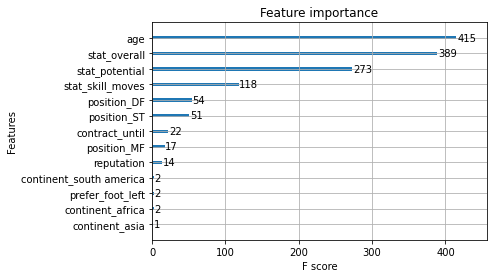

In [ ]:
xgb.plot_importance(xgb_reg)

## catboost

### 학습

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 모델링 라이브러리
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
cat_reg = CatBoostRegressor(n_estimators=200, random_state=42)

# cat_reg.fit(train_x,train_y)
# pred = cat_reg.predict(val_x)
# mse = mean_squared_error(val_y,pred)
# rmse = mse**(1/2)

# print("RMSE: ",rmse)

In [ ]:
rmse_list = []
cat_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    cat_reg.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in cat_reg.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in cat_reg.predict(test_df)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    cat_pred += (sub_pred / 10)

Learning rate set to 0.210599
0:	learn: 1.1419028	total: 48.3ms	remaining: 9.62s
1:	learn: 0.9485810	total: 50ms	remaining: 4.95s
2:	learn: 0.7858715	total: 51.6ms	remaining: 3.39s
3:	learn: 0.6572026	total: 53.3ms	remaining: 2.61s
4:	learn: 0.5518348	total: 55ms	remaining: 2.14s
5:	learn: 0.4623042	total: 56.5ms	remaining: 1.83s
6:	learn: 0.3908390	total: 58.2ms	remaining: 1.6s
7:	learn: 0.3375337	total: 60.3ms	remaining: 1.45s
8:	learn: 0.2932118	total: 62.3ms	remaining: 1.32s
9:	learn: 0.2576311	total: 64ms	remaining: 1.22s
10:	learn: 0.2279918	total: 65.9ms	remaining: 1.13s
11:	learn: 0.2057069	total: 67.7ms	remaining: 1.06s
12:	learn: 0.1857016	total: 69.5ms	remaining: 1000ms
13:	learn: 0.1705248	total: 71.4ms	remaining: 948ms
14:	learn: 0.1581547	total: 73ms	remaining: 901ms
15:	learn: 0.1479390	total: 75ms	remaining: 863ms
16:	learn: 0.1400706	total: 76.8ms	remaining: 827ms
17:	learn: 0.1341091	total: 78.6ms	remaining: 794ms
18:	learn: 0.1299379	total: 80.3ms	remaining: 765ms
19

## LGBM

### 학습

In [ ]:
# 모델링 관련 라이브러리
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgbm
from lightgbm import LGBMRegressor

In [ ]:
lgbm_reg = LGBMRegressor(n_estimators=200, random_state=42, eval_set=[train_x,train_y])

# print(len(train_x), len(val_x))
# lgbm_reg.fit(train_x, train_y)
# pred = lgbm_reg.predict(val_x)
# mse= mean_squared_error(val_y,pred)
# rmse= mse**(1/2)

# print("RMSE : ", rmse)

In [ ]:
rmse_list = []
lgbm_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
  tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
  val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
  lgbm_reg.fit(tr_x, tr_y)
    
  pred = np.expm1([0 if x < 0 else x for x in lgbm_reg.predict(val_x)])
  sub_pred = np.expm1([0 if x < 0 else x for x in lgbm_reg.predict(test_df)])
  rmse = np.sqrt(mean_squared_error(val_y, pred))
    
  rmse_list.append(rmse)
    
  lgbm_pred += (sub_pred / 10)

# 제출

In [ ]:
test.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

In [ ]:
submission = pd.read_csv('submission.csv')
submission['value']=(rf_pred + xgb_pred + cat_pred + lgbm_pred + gbm_pred + ngb_pred)/6

In [ ]:
submission.to_csv('sub_model+kf+6_1.csv',index=False)

# 4. 결론

스코어 기준: RMSE
1. 22.12.19 제출 스코어: 1229799.85838
* 사용모델 : RandomForestRegressor, XGBoostRegressor
* 전처리: label encoding, feature selection
* 하이퍼파라미터 튜닝: optuna

2. 22.12.20 제출 스코어: 1137704.77912
* 사용모델:RandomForestRegressor, XGBoostRegressor, catboostRegressor
* 전처리: label encoding, feature selection, standard scaling
* 하이퍼파라미터 튜닝: optuna

3. 22.12.27 제출 스코어: 1023770.34511
* 사용모델: RandomForestRegressor, XGBoostRegressor, CatBoostRegressor, LGBMRegressor, NGBoostRegressor, GradientBoost
* 전처리: label encoding, feature selection, standard scaling, value log 변환, 더미화
* 튜닝: KFold 10

4. 22.12.28 제출 스코어: 962302.37451
* 사용모델 : RandomForestRegressor, XGBoostRegressor, CatBoostRegressor, LGBMRegressor, NGBoostRegressor, GradientBoost
* 전처리: continent 더미화 추가, feature selection, standard scaling, value log 변환
* 튜닝: KFold 10

### 발전방향
* stacking